# HW6 Data exploration and linear model

In [3]:
import pandas as pd
#for graphing:
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
# load data
tax = pd.read_csv("incomeTaxData.csv")
tax

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order
0,2011,Hamilton,"500,000 and over",d/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,13
1,2003,Dutchess,"100,000 - 199,999",NaN,12738.0,1668991.0,261775.0,16628.0,1390589.0,91652.0,87689.0,19,10
2,2001,Ontario,Total,NaN,44898.0,1829734.0,449962.0,25393.0,1354378.0,77454.0,72764.0,38,12
3,2012,New York City - Richmond,"30,000 - 39,999",NaN,16086.0,559918.0,192402.0,10519.0,356997.0,17286.0,12238.0,5,5
4,2007,Clinton,"50,000 - 59,999",NaN,2197.0,120482.0,29429.0,1649.0,89404.0,4738.0,4220.0,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,2013,Residence Unknown ++,"100,000 - 199,999",NaN,527.0,74543.0,10177.0,282.0,64083.0,4095.0,3720.0,66,10
12585,2013,Residence Unknown ++,"200,000 - 249,999",NaN,127.0,28013.0,3219.0,93.0,24702.0,1643.0,1469.0,66,11
12586,2013,Residence Unknown ++,"250,000 - 499,999",NaN,223.0,79218.0,5876.0,174.0,73168.0,4972.0,4492.0,66,12
12587,2013,Residence Unknown ++,"500,000 and over",NaN,326.0,872846.0,14092.0,290.0,858465.0,71780.0,63360.0,66,13


You can see just from the first line of the dataset that the there are some rows with no **returns** associated with it. Let's delete those from the dataset.

Also note that all of the data is in **thousands of dollars**.

In [5]:
# clean data
tax = tax.dropna(subset=['ReturnCount'])
tax = tax.sort_values(by=['Year'])
# create new columns
tax['avg_tax'] = tax['TotalTaxLiability']/tax['ReturnCount']

## a)


Plot the number of returns in Tompkins County from each income class bracket over time on a single graph.（Ignore the rows with the class of 'Total'. Should span 1999-2013. Some of the county names may have leading/trailing whitespaces.）

Text(0, 0.5, 'Return Count')

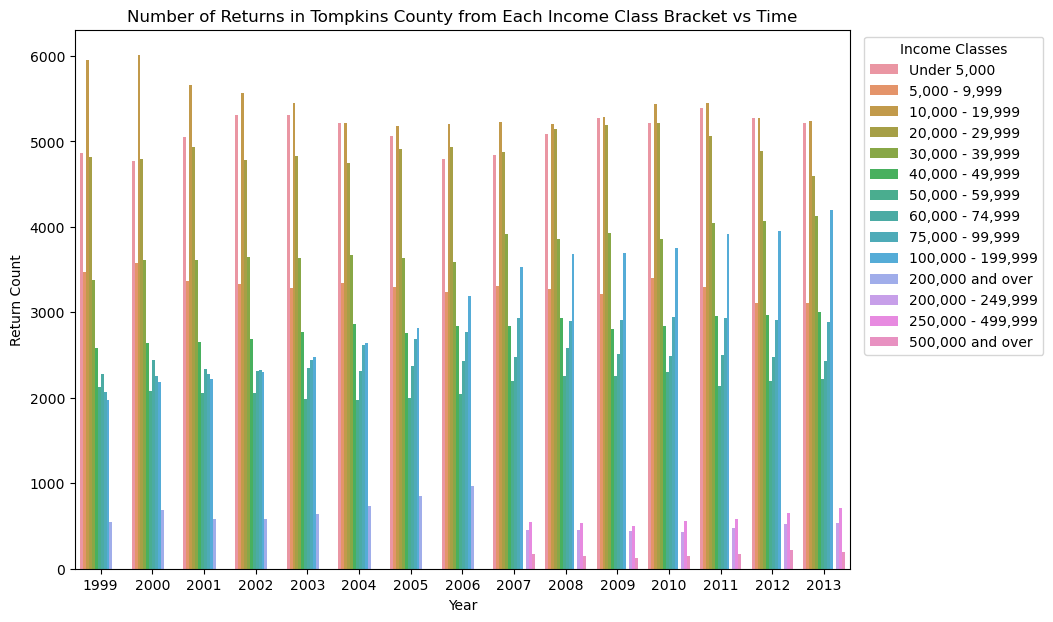

In [6]:
###Enter your codes here

#strip whitespaces in 'County' and get a separate tompkins county df without Total income class
tax['County'] = tax['County'].str.strip()
taxTC = tax.loc[(tax['County'] == 'Tompkins') & (tax['IncomeClass'] != 'Total')]

#set ascending order income class and then plot
order = ['Under 5,000','5,000 - 9,999', '10,000 - 19,999', '20,000 - 29,999', '30,000 - 39,999', '40,000 - 49,999',
         '50,000 - 59,999', '60,000 - 74,999', '75,000 - 99,999', '100,000 - 199,999', '200,000 and over', 
         '200,000 - 249,999', '250,000 - 499,999', '500,000 and over']
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1 = sns.barplot(data = taxTC, x = "Year", y = "ReturnCount", hue = 'IncomeClass',ax=ax1, hue_order=order)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title = 'Income Classes')
ax1.set_title('Number of Returns in Tompkins County from Each Income Class Bracket vs Time')
ax1.set_ylabel('Return Count')




Plot the average income tax per return in Tompkins County (disregarding income class).（You could add up the all income classes (except 'Total') to calculate the weighted average tax OR just plot the rows of 'Total'. The sum might differ from the number in 'total'; either answer is ok. Messy data!)

Text(0, 0.5, 'Average Income Tax')

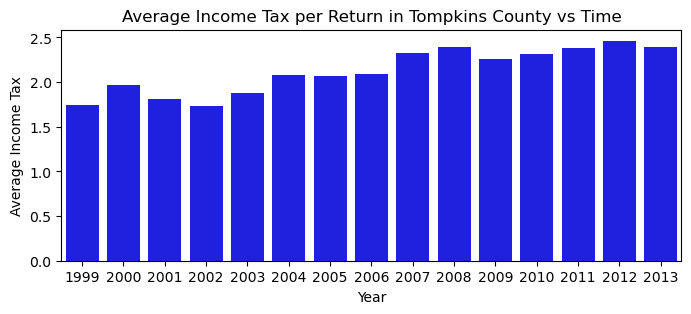

In [7]:
###Enter your codes here

#get a separate tompkins county df with just Total income class
taxTCtot = tax.loc[(tax['County'] == 'Tompkins') & (tax['IncomeClass'] == 'Total')]

#plot
fig2, ax2 = plt.subplots(figsize=(8,3))
ax2 = sns.barplot(data = taxTCtot, x='Year', y='avg_tax', ax = ax2, color= 'blue')
ax2.set_title('Average Income Tax per Return in Tompkins County vs Time'); ax2.set_ylabel('Average Income Tax')


Question: What kind of plot did you choose to make? Why?

Answer:


<span style="color:red">I chose barplots because I thought this best represented the data. Lineplots would be misleading as they suggest continuous change over the years, but it is discrete. Scatterplot would also work, but I thought the barplot just looked nicer.

## b)

Continuing to look only at Tompkins County, fit a linear model that predicts **avg_tax** using the year number. Do this with **least squares**.

In [8]:
###Enter your codes here

#using np.linalg.lstsq function
import numpy as np

#make year matrix, append offset
years = np.array([taxTCtot['Year']])
ones = np.ones((15,1)).T
yearM = np.concatenate((years, ones)).T

#run least squares equation
avgTax = np.array(taxTCtot['avg_tax'])
wb, resid_b, rank_b, s_b = np.linalg.lstsq(yearM, avgTax)


/var/folders/31/n7d1lkjj6y1_lcp76m8nrtbh0000gn/T/ipykernel_63171/414768389.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  wb, resid_b, rank_b, s_b = np.linalg.lstsq(yearM, avgTax)


Transform the input to include an offset term in the model

In [9]:
###Enter your codes here

#completed above


## c)

Now we will change the feature space. Fit a model using the **year** and the **avg_tax** from the previous year (and offset).

In [10]:
###Enter your codes here

#make input matrix
avgTaxPrev = np.append(0, np.array([taxTCtot['avg_tax'][:14]])).reshape(1,15)
yravgM = np.concatenate((years, avgTaxPrev, ones)).T

#run least squares equation
wc, resid_c, rank_c, s_c = np.linalg.lstsq(yravgM, avgTax)


/var/folders/31/n7d1lkjj6y1_lcp76m8nrtbh0000gn/T/ipykernel_63171/3964666021.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  wc, resid_c, rank_c, s_c = np.linalg.lstsq(yravgM, avgTax)


Question: Interpret the coefficients of this. What do they mean?

Answer:

<span style="color:red">The coefficients for the year and previous average tax are .0053 and .0022 respectively. This means that the year is twice as impactful for predicting the average tax. The offset is 99, as the coefficient is -99. This is a high value compared to the average tax values, which makes intuitive sense because the year values are 3 orders of magnitude greater.

Plot the real average tax return per year against your model's prediction. Discuss how you think your model fits.

Text(0, 0.5, 'Predicted Average Tax Return per Year')

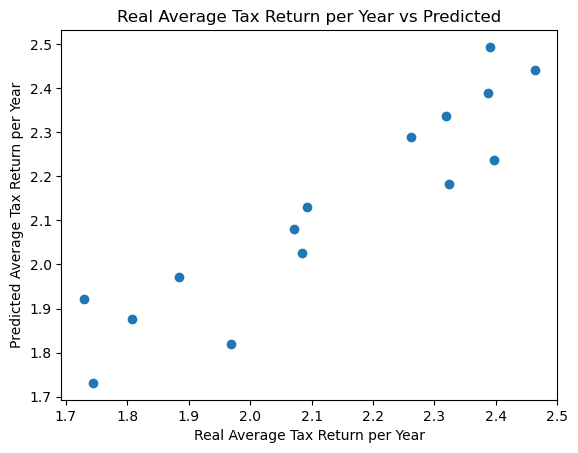

In [16]:
###Enter your codes here

avgTaxPred = np.matmul(yravgM, wc)
plt.scatter(avgTax, avgTaxPred)
plt.xlabel('Real Average Tax Return per Year')
plt.title('Real Average Tax Return per Year vs Predicted')
plt.ylabel('Predicted Average Tax Return per Year')


Discussion: 

<span style="color:red"> The model seems to fit well by visual inspection. Also, the residual sum of squares resid_c is 0.135, which is pretty small. 

## d)

Add two new features to your model. This could be a column of the data, a transformation of a column, or a new column formed from another. The only requirement is that the prediction in year $t$ be based on data avilable by the end of year $t-1$

State the feature space for your new model and why you think those features predict the data well. Fit this model and interpret the coefficients.

In [19]:
###Enter your codes here

#two new columns: TotalIncome and TotalDeductions
totIncPrev = np.append(0, np.array([taxTCtot['TotalIncome'][:14]])).reshape(1,15)
totDedPrev = np.append(0, np.array([taxTCtot['TotalDeductions'][:14]])).reshape(1,15)
pdM = np.concatenate((years, avgTaxPrev, totIncPrev, totDedPrev, ones)).T

#run least squares equation
wd, resid_d, rank_d, s_d = np.linalg.lstsq(pdM, avgTax)


/var/folders/31/n7d1lkjj6y1_lcp76m8nrtbh0000gn/T/ipykernel_63171/2942181033.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  wd, resid_d, rank_d, s_d = np.linalg.lstsq(pdM, avgTax)


Answer to the question:

<span style="color:red">Honestly, I don't know a lot about taxes so I just chose the next two columns. All of the values in every column has an upward trend, as well, so nothing was noticeably distinguishable.

<span style="color:red">The coefficients for year, previous average tax, previous total income, and previous total deductions are 0.04, -0.69, 8.7E-7, and 7.3E-8 respectively. The previous total income and previous total deductions coeffs. are low magnitudes because those values are high magnitude. Average tax has coeff has a higher magnitude because those column values are significantly smaller.


## e)

Compare the coefficients from part c and d. Does the coefficient of avg_tax differ in the two models? If so, how do you interpret this difference?

Answer:

<span style="color:red"> The coefficients for average tax differ significantly for wc and wd. I think the value in wd becomes negative because it helps if something subtracts from the high magnitudes of the other columns.

## f)

(see homework handout for details) Now we want to see how this model performs in **other counties**. Apply the model you fit in part c, with coefficients $w^c$, to data from the other counties and compute the error of this model on each data set.

Plot a histogram of the mean errors the model makes.

(array([57.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.35287187e-01, 8.15162190e+01, 1.62897151e+02, 2.44278083e+02,
        3.25659015e+02, 4.07039946e+02, 4.88420878e+02, 5.69801810e+02,
        6.51182742e+02, 7.32563674e+02, 8.13944605e+02]),
 <BarContainer object of 10 artists>)

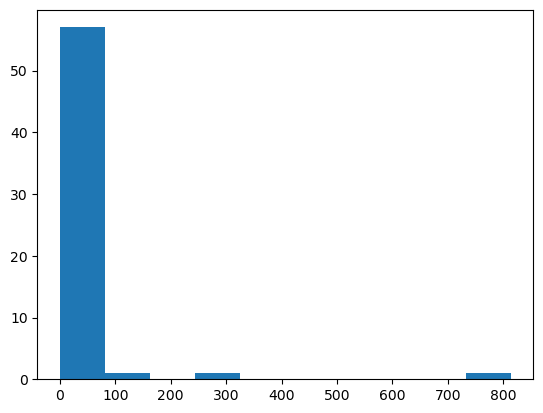

In [53]:
###Enter your codes here

#LOOP THROUGH EACH COUNTY TO RUN FIND RESIDUALS FOR EACH

#first get county names
counties = tax.County.unique()
countiesClean = np.delete(counties, np.where(counties == 'NYS Unclassified +'))
countiesClean = np.delete(countiesClean, np.where(countiesClean == 'Residence Unknown ++'))
countiesClean = np.delete(countiesClean, np.where(countiesClean == 'Grand Total, Full-Year Resident'))

#empty residual vector
residuals = []

#actual loop
for county in countiesClean:
    #get county totals
    taxCountyTots = tax.loc[(tax['County'] == county) & (tax['IncomeClass'] == 'Total')]
 
    #check if all years, if so proceed with least squares calculation
    if len(taxCountyTots) == 15:
        #matrix formation
        yrs = np.array([taxCountyTots['Year']])
        txPrv = np.append(0, np.array([taxTCtot['avg_tax'][:14]])).reshape(1,15)
        M = np.concatenate((yrs, txPrv, ones)).T
        
        #prediction values
        pred = np.matmul(M, wc)

        #least squares
        resid = np.sum(np.square(taxCountyTots['avg_tax']-pred[:]))
        residuals.append(resid)
       
#plot, showing raw
plt.hist(residuals)
        

(array([8., 3., 3., 1., 1., 0., 1., 6., 4., 4., 3., 1., 1., 3., 2., 3., 2.,
        7., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 artists>)

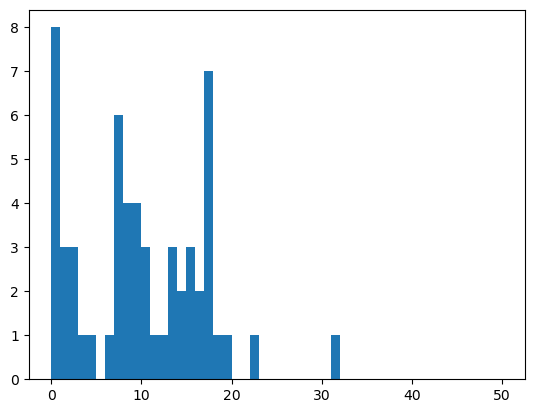

In [56]:
#plot, ignoring outliers
plt.hist(residuals, range=[0,50], bins = 50)

Are there major outliers?


Answer:

<span style="color:red">813 and 312 appear to be outliers, and you could maybe say 84 and 31 are, as well.

<span style="color:red">It appears that Tompkins County is the lowest residual and all others are higher.

## g)

Using the same features you chose in part d, fit a model to the data for each of the other counties. These will be county-specific models. They may have different coefficient vectors from $w^d$.

Plot a histogram of the mean square errors of the county-specific models for their respective counties.

In [57]:
###Enter your codes here

#SAME LOOP AS BEFORE, JUST WITH WD AND ADD TOTALINCOME/TOTALDEDUCTIONS...
#unfortunately I ran out of time

#empty residual vector
residuals = []

#actual loop
for county in countiesClean:
    #get county totals
    taxCountyTots = tax.loc[(tax['County'] == county) & (tax['IncomeClass'] == 'Total')]
 
    #check if all years, if so proceed with least squares calculation
    if len(taxCountyTots) == 15:
        #matrix formation
        yrs = np.array([taxCountyTots['Year']])
        txPrv = np.append(0, np.array([taxTCtot['avg_tax'][:14]])).reshape(1,15)
        M = np.concatenate((yrs, txPrv, ones)).T
        
        #prediction values
        pred = np.matmul(M, wd)

        #least squares
        resid = np.sum(np.square(taxCountyTots['avg_tax']-pred[:]))
        residuals.append(resid)
       
#plot, showing raw
plt.hist(residuals)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 3)

Again, are there major outliers? How do the coefficients compare across counties?

Answer:

## h)

If you wanted to predict the income tax in each county in future years, do you think the county-specific models or the Tompkins model would perform better? Why? What concerns might you have about each model?

Answer:

## i)

What other information would you want to use to make your model even better?

Answer:

THIS IS MY ANSWER FOR QUESTION 2 !!!

This course is awesome and I am learning a lot. The professor and TAs are a great help.
I think the homework could be written with better clues. For example, in this assignment my first instinct was to use the demonstrated gradient_descent.ipynb from class, but a TA told me to do a simpler function. Without this guidance, I would've had a lot of difficulty with implementing that. Maybe only I made this mistake, but something I wanted to mention...happens in other HWs too.